In [1]:
# Missing  Data Analysis
   # Missing data type
   # Accidential missing (Completely)
   # Accidential missing
   # not coincidence missing

# Missing Data randomness Test
   # Visual techniques
   # Independence 2 Sample T Test
   # Correlation Test
   # Little's MCAR Test

# Missing Data Solutions:

   # Deletion Method
     # Observation or variable delete method
     # Listwise Method
     # Pairwise Method
        
   # Value assignment methods
     # Mod, median, mean
     # Hot deck (most similar unit)
     # Outsourced 
 
   # Predictive methods
     # Machine Learning
     # EM
     # Multiple assignments methods

In [25]:
import numpy as np
import pandas as pd

d1 = np.array([np.NaN,5,np.NaN, 3,4,11, 12, 17])
d2 = np.array([1,np.NaN, 2,11,np.NaN, 7, np.NaN, 12])
d3 = np.array([23,2,1,np.NaN, np.NaN, 32,np.NaN, np.NaN])

df = pd.DataFrame({
    "d1":d1, "d2":d2, "d3":d3
})

In [26]:
df

,d1,d2,d3
0,NaN,1.0,23.0
1,5.0,NaN,2.0
2,NaN,2.0,1.0
3,3.0,11.0,NaN
4,4.0,NaN,NaN
5,11.0,7.0,32.0
6,12.0,NaN,NaN
7,17.0,12.0,NaN


In [27]:
df.isnull().sum()

d1    2
d2    3
d3    4
dtype: int64

In [28]:
df.notnull().sum()

d1    6
d2    5
d3    4
dtype: int64

In [29]:
df.isnull().sum().sum()

9

In [30]:
df.isnull()

,d1,d2,d3
0,True,False,False
1,False,True,False
2,True,False,False
3,False,False,True
4,False,True,True
5,False,False,False
6,False,True,True
7,False,False,True


In [31]:
df[df.isnull().any(axis=1)]

,d1,d2,d3
0,NaN,1.0,23.0
1,5.0,NaN,2.0
2,NaN,2.0,1.0
3,3.0,11.0,NaN
4,4.0,NaN,NaN
6,12.0,NaN,NaN
7,17.0,12.0,NaN


In [32]:
df[df.notnull().all(axis=1)]

,d1,d2,d3
5,11.0,7.0,32.0


In [33]:
df[df["d1"].notnull() & df["d2"].notnull() & df["d3"].notnull()]

,d1,d2,d3
5,11.0,7.0,32.0


In [34]:
# Delete missing values

df.dropna()  # inplace=True for permanent deletion

,d1,d2,d3
5,11.0,7.0,32.0


In [35]:
df

,d1,d2,d3
0,NaN,1.0,23.0
1,5.0,NaN,2.0
2,NaN,2.0,1.0
3,3.0,11.0,NaN
4,4.0,NaN,NaN
5,11.0,7.0,32.0
6,12.0,NaN,NaN
7,17.0,12.0,NaN


In [36]:
# assingment value

df["d1"].fillna(df["d1"].mean())

0     8.666667
1     5.000000
2     8.666667
3     3.000000
4     4.000000
5    11.000000
6    12.000000
7    17.000000
Name: d1, dtype: float64

In [37]:
df["d2"].fillna(7)

0     1.0
1     7.0
2     2.0
3    11.0
4     7.0
5     7.0
6     7.0
7    12.0
Name: d2, dtype: float64

In [38]:
df

,d1,d2,d3
0,NaN,1.0,23.0
1,5.0,NaN,2.0
2,NaN,2.0,1.0
3,3.0,11.0,NaN
4,4.0,NaN,NaN
5,11.0,7.0,32.0
6,12.0,NaN,NaN
7,17.0,12.0,NaN


In [39]:
df.apply(lambda x: x.fillna(x.mean()), axis=0)

,d1,d2,d3
0,8.666667,1.0,23.0
1,5.000000,6.6,2.0
2,8.666667,2.0,1.0
3,3.000000,11.0,14.5
4,4.000000,6.6,14.5
5,11.000000,7.0,32.0
6,12.000000,6.6,14.5
7,17.000000,12.0,14.5


In [40]:
# Missing Data Visualization 

In [41]:
import missingno as msno

<Axes: >

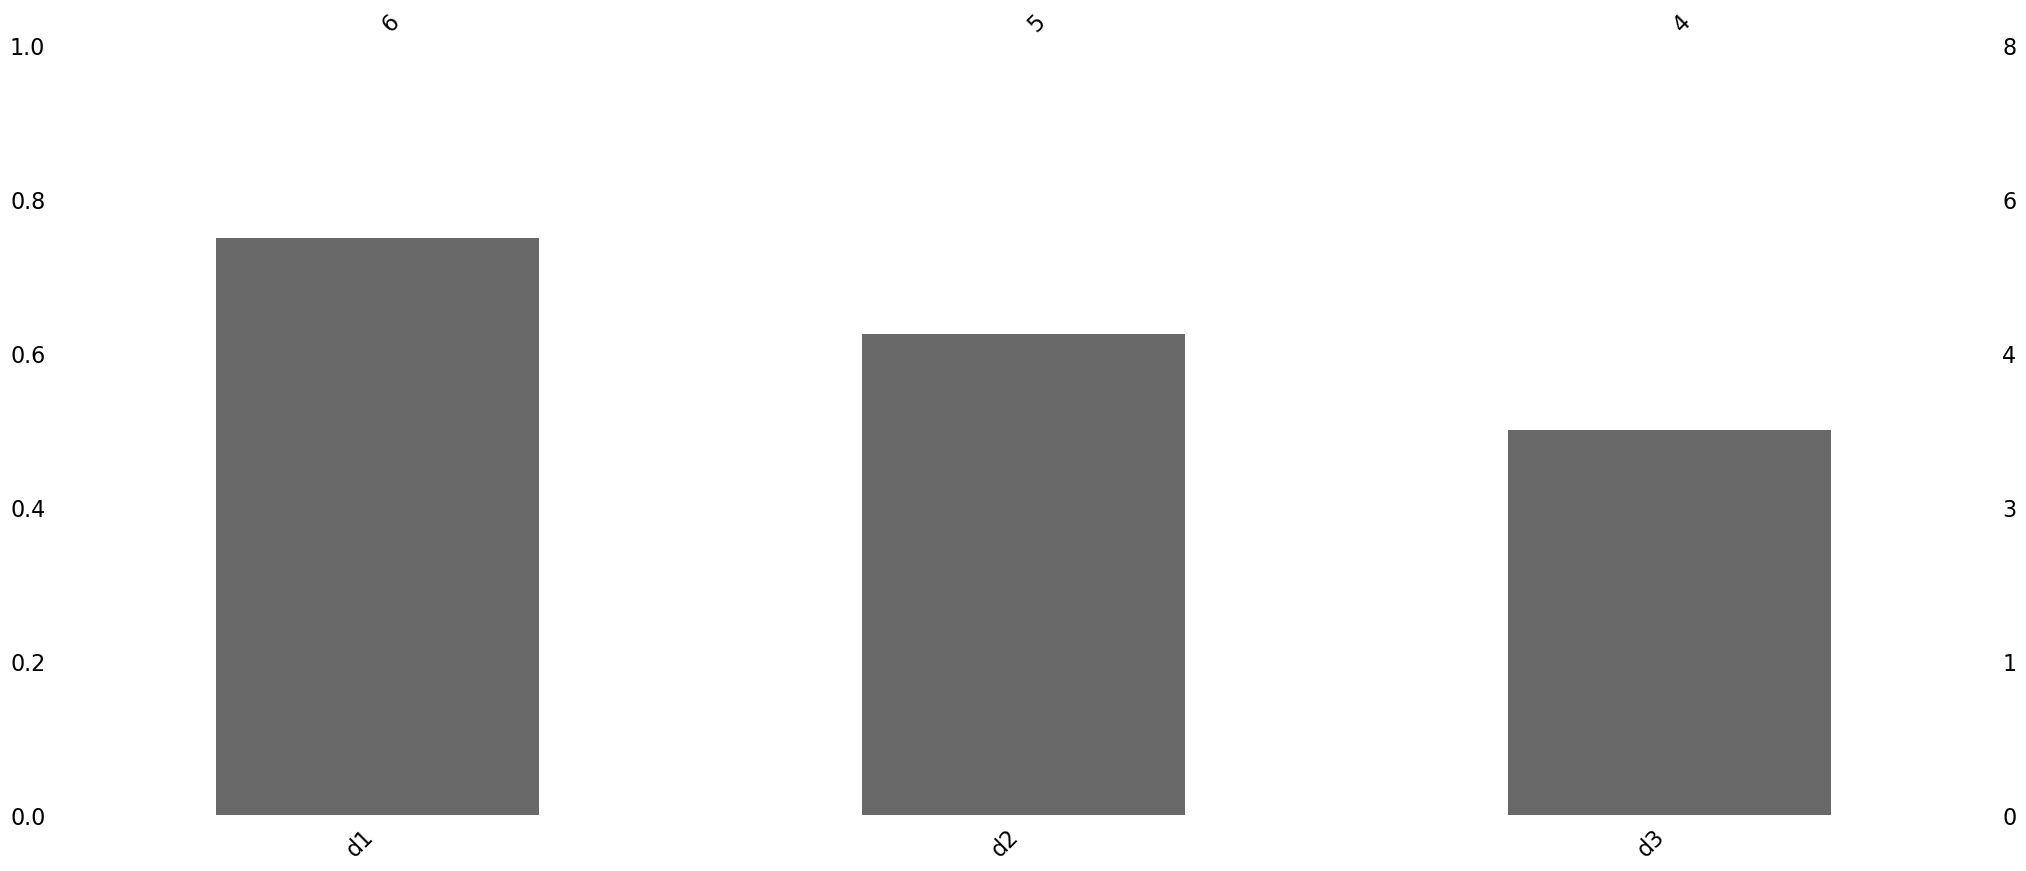

In [42]:
msno.bar(df)

<Axes: >

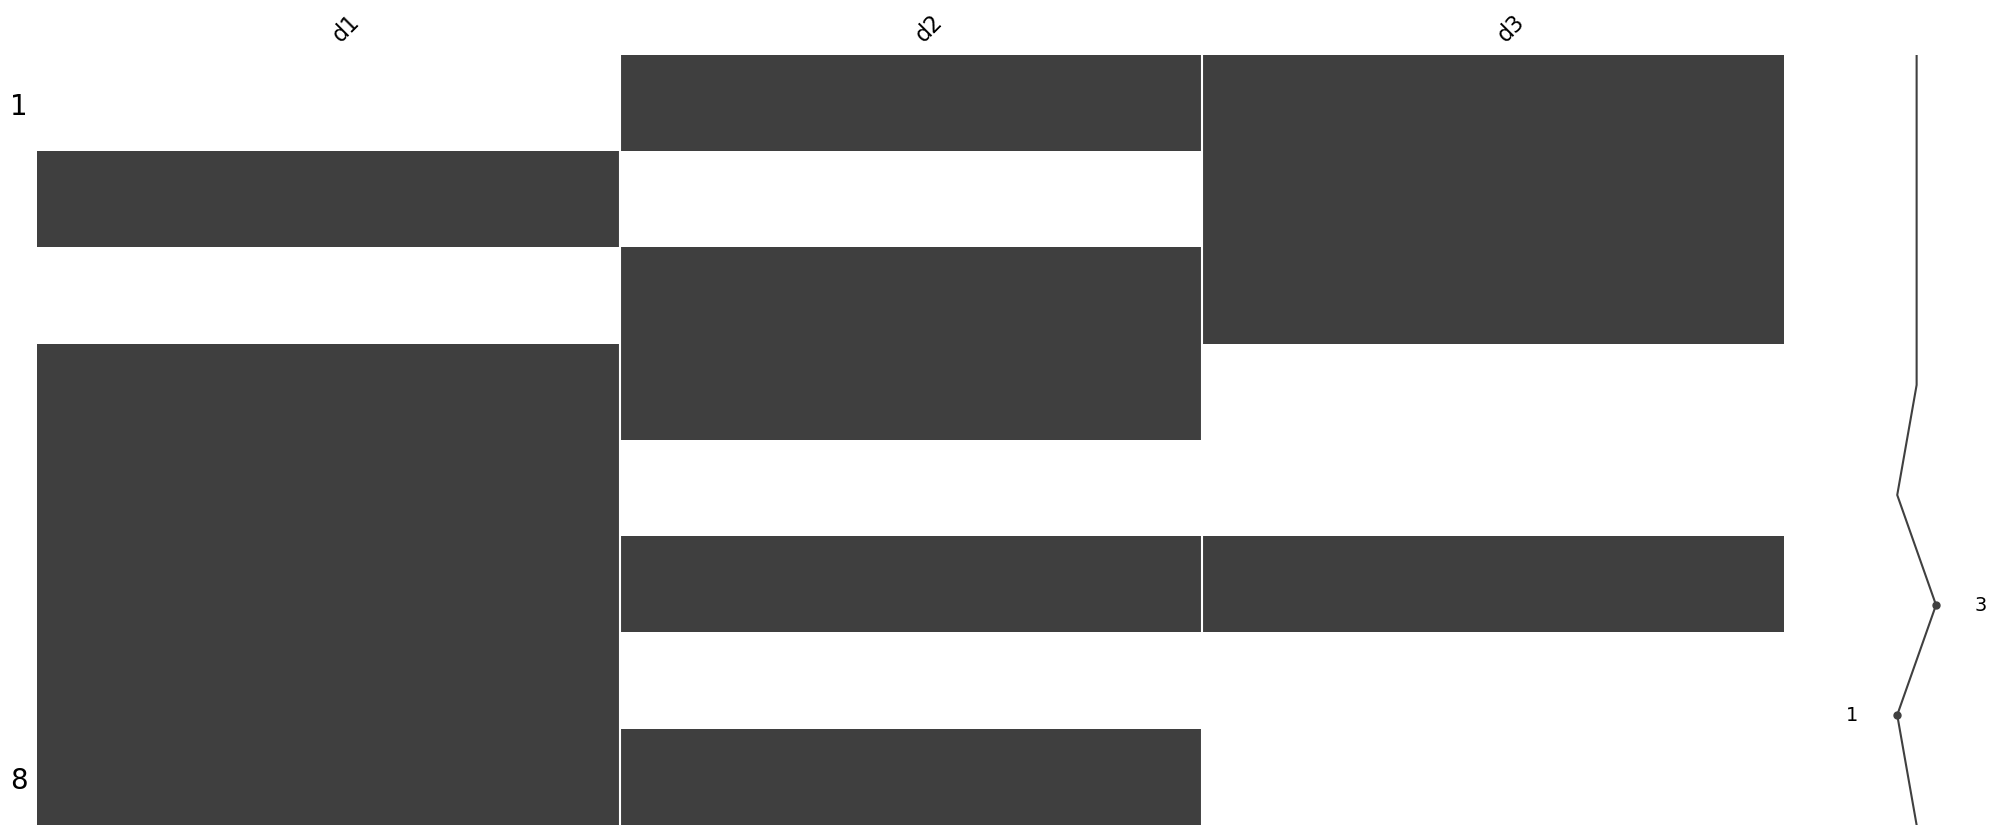

In [43]:
msno.matrix(df)

In [44]:
df

,d1,d2,d3
0,NaN,1.0,23.0
1,5.0,NaN,2.0
2,NaN,2.0,1.0
3,3.0,11.0,NaN
4,4.0,NaN,NaN
5,11.0,7.0,32.0
6,12.0,NaN,NaN
7,17.0,12.0,NaN


In [48]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [50]:
planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

<Axes: >

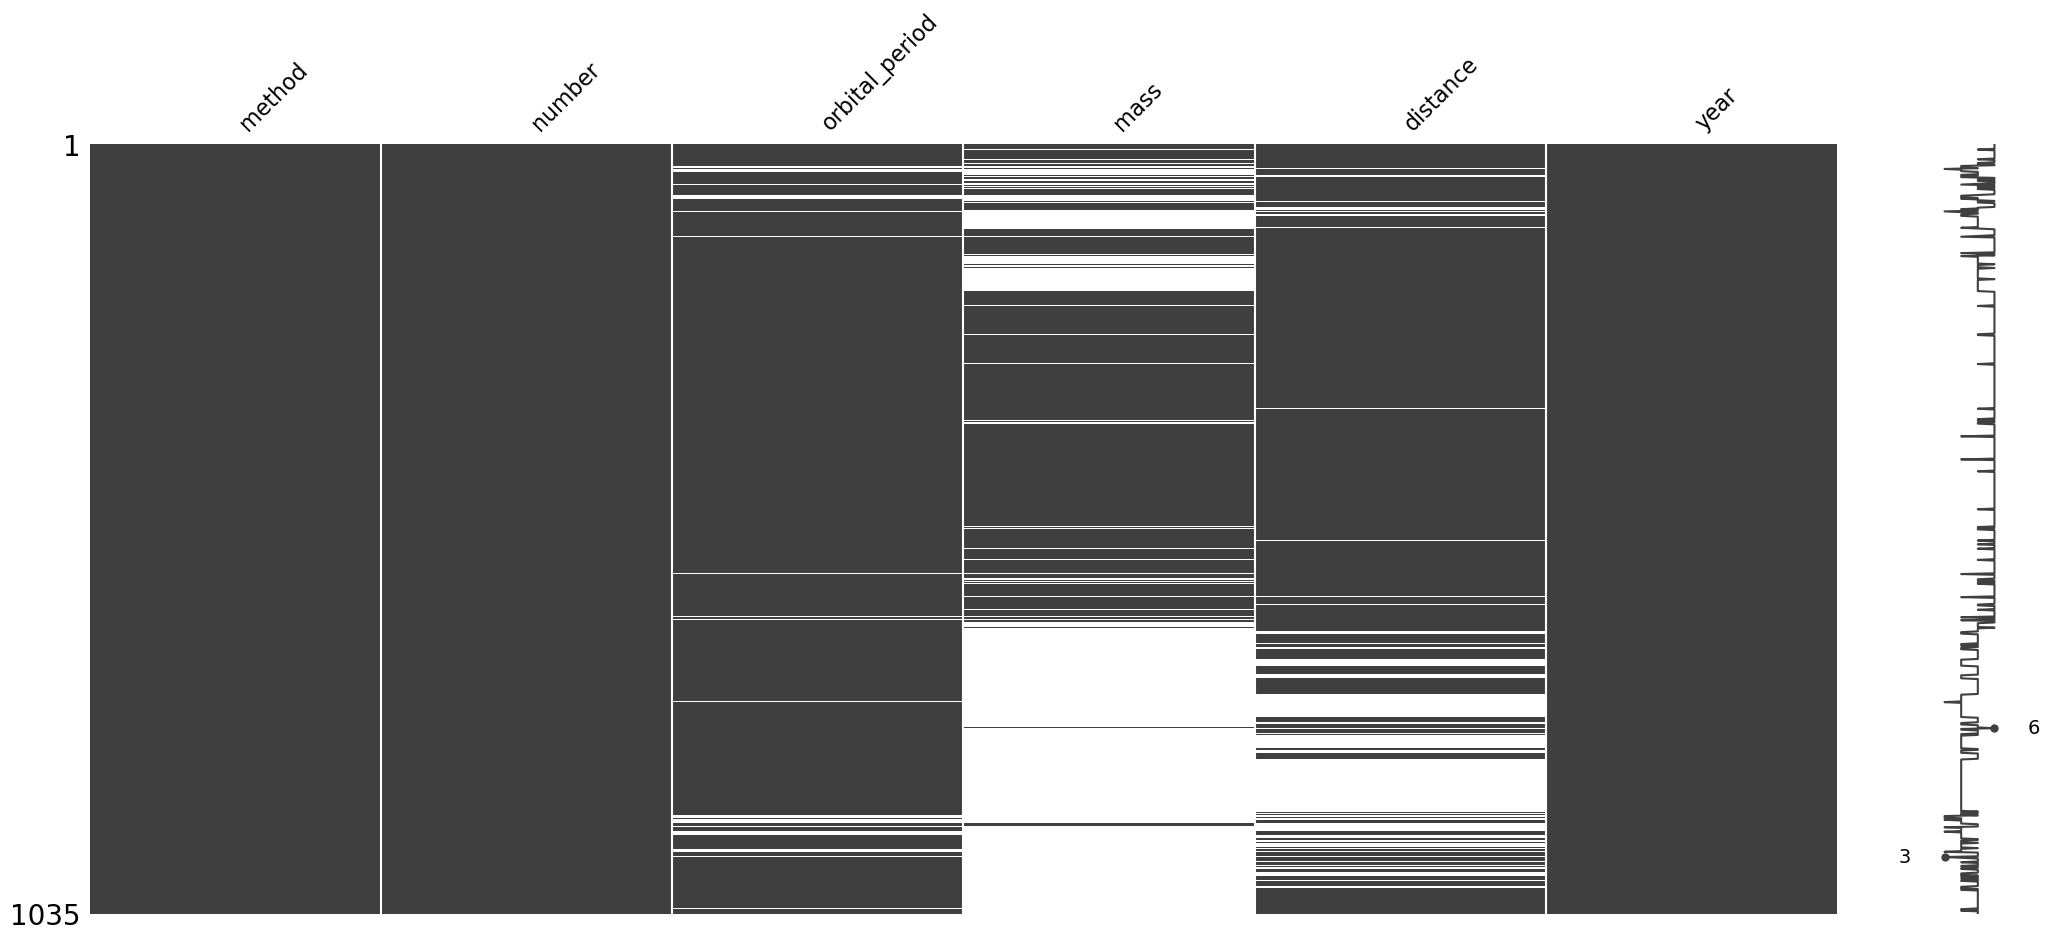

In [51]:
msno.matrix(planets)

<Axes: >

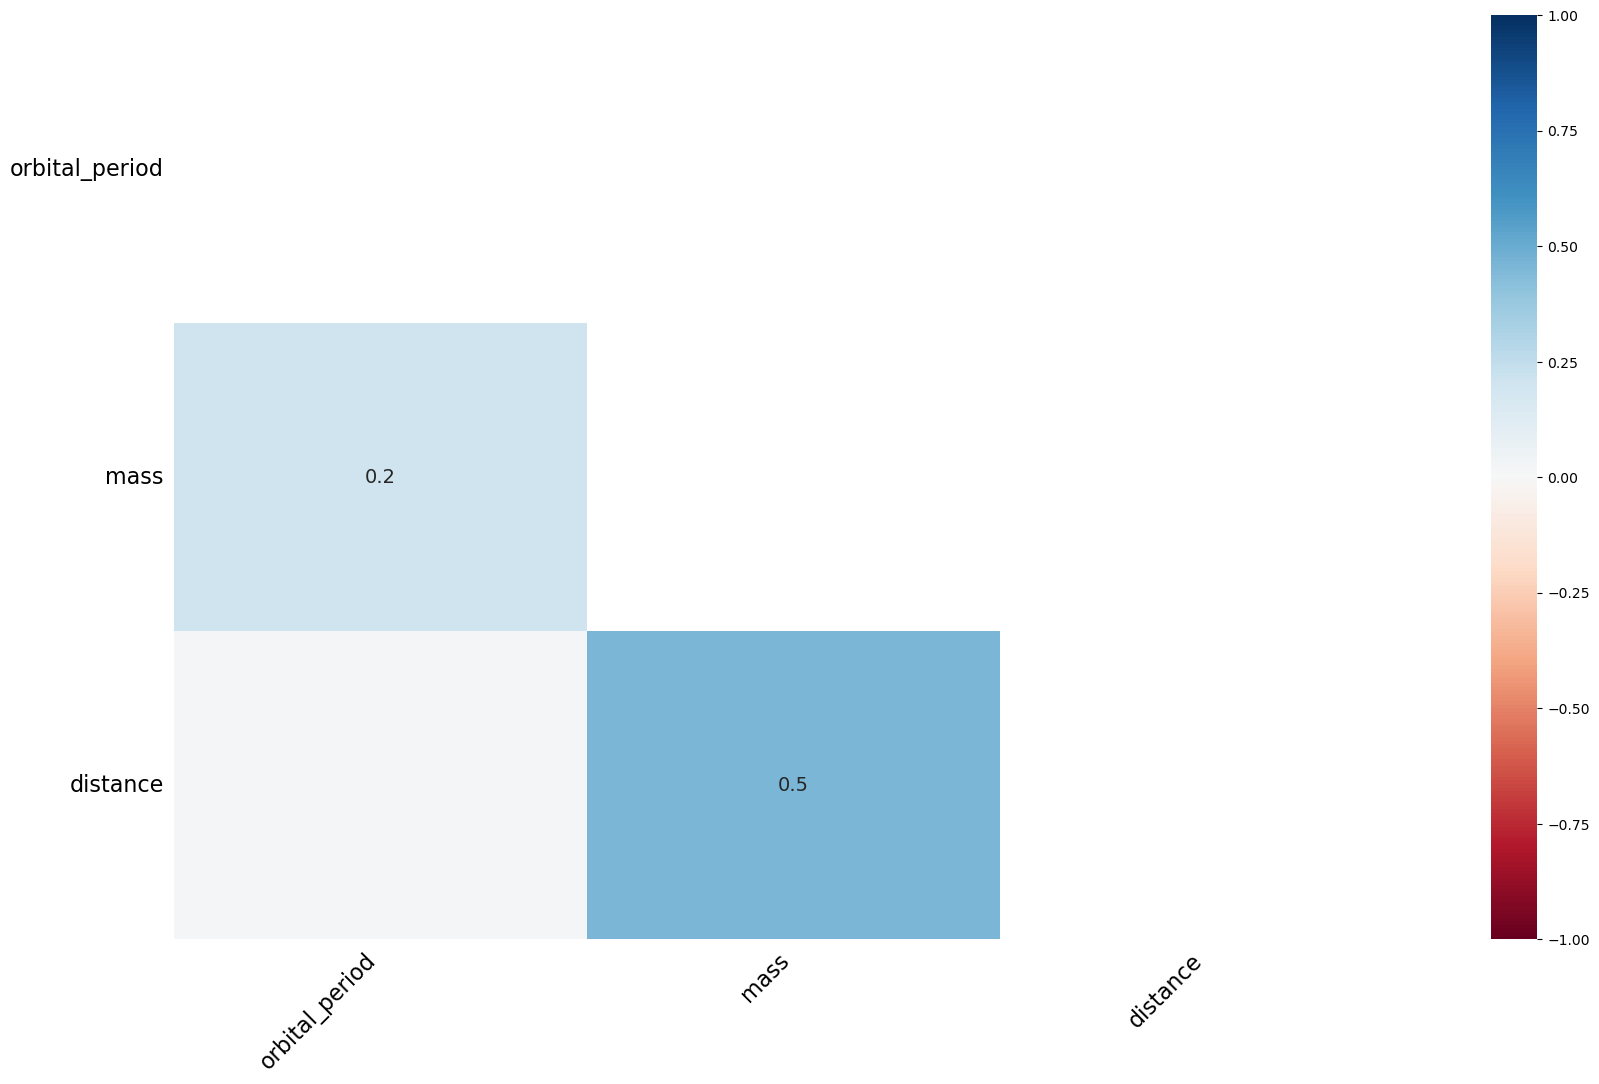

In [57]:
msno.heatmap(planets)   # non correlation 

In [59]:
# Deletion Methods

import numpy as np
import pandas as pd

d1 = np.array([np.NaN,5,np.NaN, 3,4,11, 12, 17])
d2 = np.array([1,np.NaN, 2,11,np.NaN, 7, np.NaN, 12])
d3 = np.array([23,2,1,np.NaN, np.NaN, 32,np.NaN, np.NaN])

df1 = pd.DataFrame({
    "d1":d1, "d2":d2, "d3":d3
})

In [60]:


df1.dropna()

,d1,d2,d3
5,11.0,7.0,32.0


In [61]:
df1.dropna(how = "all")

,d1,d2,d3
0,NaN,1.0,23.0
1,5.0,NaN,2.0
2,NaN,2.0,1.0
3,3.0,11.0,NaN
4,4.0,NaN,NaN
5,11.0,7.0,32.0
6,12.0,NaN,NaN
7,17.0,12.0,NaN


In [62]:
df1.dropna(axis=1)

""
0
1
2
3
4
5
6
7
